## Project Name : Micro Credit Defaulter Project

# Dataset Description

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. The MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.

It’s crucial to understand the importance of communication and how it affects a person’s life, thus, focusing on providing the services and products of the company to low income families and poor customers that can be helped them in the need of hour. 
The Source of this dataset is collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah).

In this dataset, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter. 

### Features:

 label	: Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
 
msisdn :	mobile number of user

 aon :	age on cellular network in days
 
daily_decr30 :	Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

daily_decr90 :	Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

rental30 :	Average main account balance over last 30 days

rental90 :	Average main account balance over last 90 days

last_rech_date_ma :	Number of days till last recharge of main account

last_rech_date_da: 	Number of days till last recharge of data account

last_rech_amt_ma :	Amount of last recharge of main account (in Indonesian Rupiah)

cnt_ma_rech30 :	Number of times main account got recharged in last 30 days

fr_ma_rech30 :	Frequency of main account recharged in last 30 days

sumamnt_ma_rech30 :	Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)

medianamnt_ma_rech30 :	Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)

medianmarechprebal30 :	Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)

cnt_ma_rech90 :	Number of times main account got recharged in last 90 days

fr_ma_rech90 :	Frequency of main account recharged in last 90 days

sumamnt_ma_rech90 :	Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)

medianamnt_ma_rech90 :	Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)

medianmarechprebal90 :	Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)

cnt_da_rech30 :	Number of times data account got recharged in last 30 days

fr_da_rech30: 	Frequency of data account recharged in last 30 days

cnt_da_rech90 : 	Number of times data account got recharged in last 90 days

fr_da_rech90 : 	Frequency of data account recharged in last 90 days

cnt_loans30 : 	Number of loans taken by user in last 30 days

amnt_loans30: 	Total amount of loans taken by user in last 30 days

maxamnt_loans30 : 	maximum amount of loan taken by the user in last 30 days

medianamnt_loans30 : 	Median of amounts of loan taken by the user in last 30 days

cnt_loans90 : 	Number of loans taken by user in last 90 days

amnt_loans90 : 	Total amount of loans taken by user in last 90 days

maxamnt_loans90 : 	maximum amount of loan taken by the user in last 90 days

medianamnt_loans90 : 	Median of amounts of loan taken by the user in last 90 days
 
payback30 :	Average payback time in days over last 30 days

payback90 :	Average payback time in days over last 90 days

pcircle : 	telecom circle

pdate :	date


In [1]:
# Importing required liraries

In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('Micro_credit_defaulter.csv')
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [5]:
df.shape

(209593, 37)

In [6]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

<AxesSubplot:>

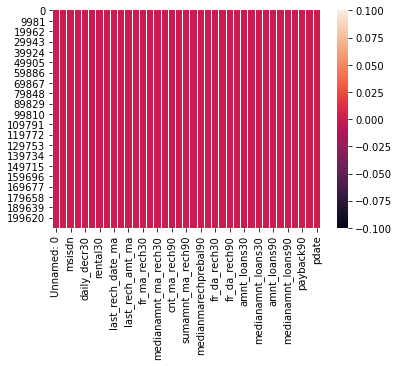

In [7]:
sns.heatmap(df.isnull())

We have no null values in the dataset.

In [8]:
for i in df:
    print(df[i].unique())
    print('***')
    print(df[i].value_counts())
    print('\n===========')

[     1      2      3 ... 209591 209592 209593]
***
2049      1
23969     1
126359    1
103832    1
105881    1
         ..
57929     1
64074     1
62027     1
51788     1
2047      1
Name: Unnamed: 0, Length: 209593, dtype: int64

[0 1]
***
1    183431
0     26162
Name: label, dtype: int64

['21408I70789' '76462I70374' '17943I70372' ... '22758I85348' '59712I82733'
 '65061I85339']
***
47819I90840    7
04581I85330    7
71742I90843    6
30080I90588    6
29191I82738    6
              ..
56523I82739    1
42203I89235    1
78457I90844    1
48387I85349    1
90736I85340    1
Name: msisdn, Length: 186243, dtype: int64

[2.72000000e+02 7.12000000e+02 5.35000000e+02 ... 8.03380622e+05
 5.81435484e+05 8.11881373e+05]
***
95.000000        392
92.000000        362
96.000000        357
99.000000        356
157.000000       349
                ... 
818222.402828      1
603666.669107      1
852238.900959      1
851325.512514      1
913930.093986      1
Name: aon, Length: 4507, dtype: int64

[ 3055.05 

Getting the unique values and values count present in each column.

## Visualization:

### Univariate analysis:

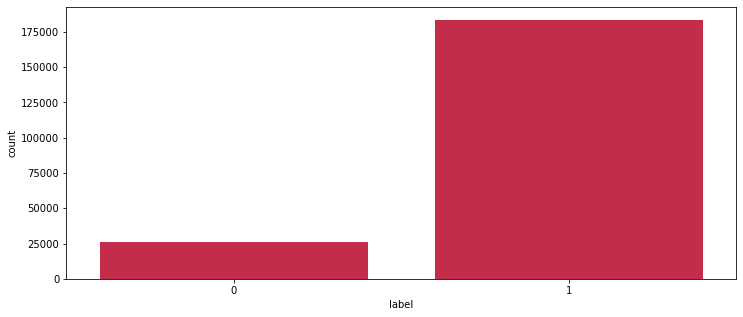

In [9]:
plt.figure(figsize=(12,5))
sns.countplot(df['label'], color='crimson')
plt.show()

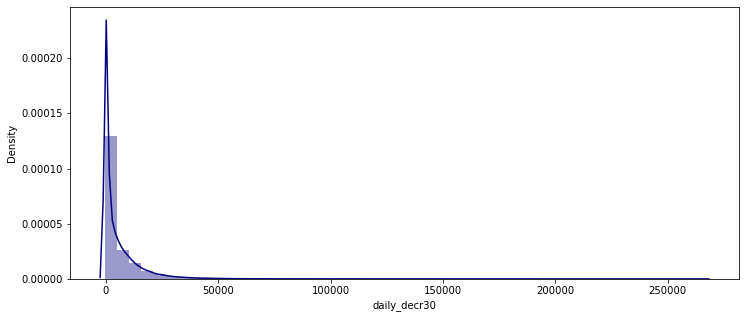

In [10]:
plt.figure(figsize=(12,5))
sns.distplot(df['daily_decr30'], color='navy')
plt.show()

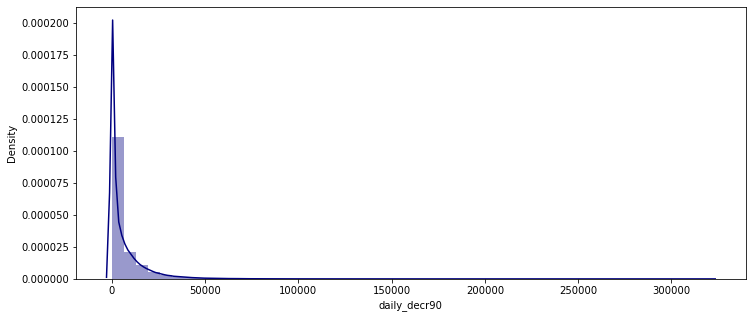

In [11]:
plt.figure(figsize=(12,5))
sns.distplot(df['daily_decr90'],color='navy')
plt.show()

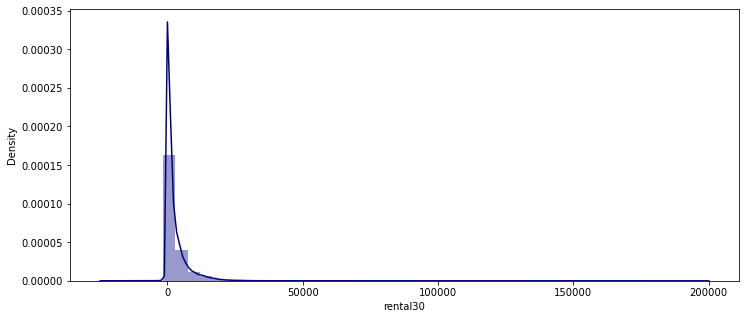

In [12]:
plt.figure(figsize=(12,5))
sns.distplot(df['rental30'], color='navy')
plt.show()

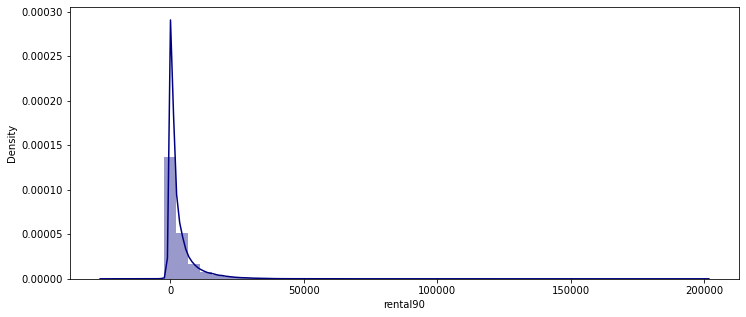

In [13]:
plt.figure(figsize=(12,5))
sns.distplot(df['rental90'], color='navy')
plt.show()

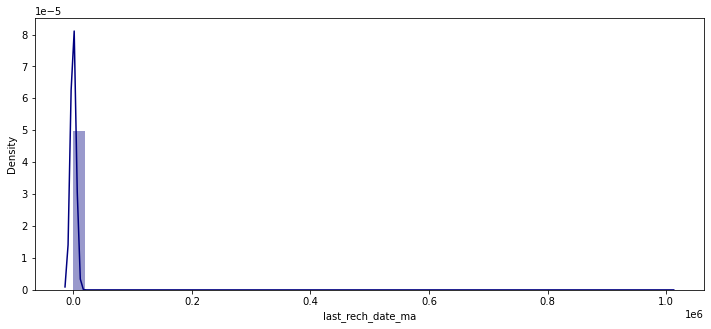

In [14]:
plt.figure(figsize=(12,5))
sns.distplot(df['last_rech_date_ma'], color='navy')
plt.show()

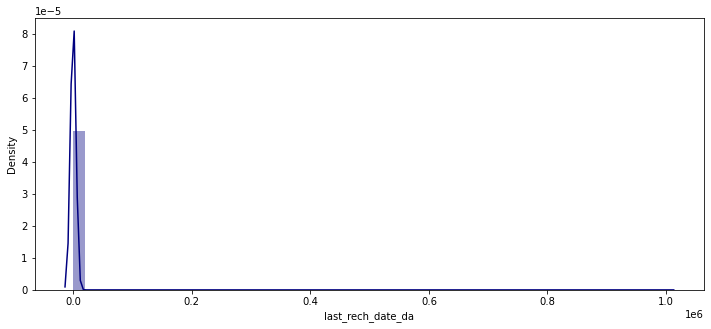

In [15]:
plt.figure(figsize=(12,5))
sns.distplot(df['last_rech_date_da'], color='navy')
plt.show()

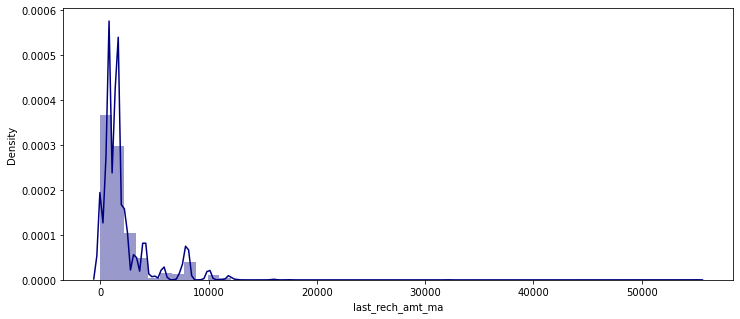

In [16]:
plt.figure(figsize=(12,5))
sns.distplot(df['last_rech_amt_ma'], color='navy')
plt.show()

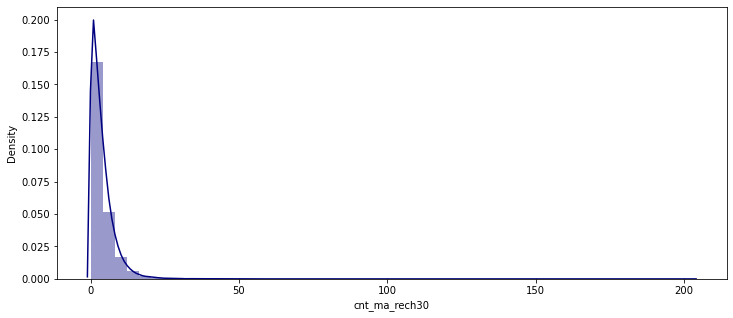

In [17]:
plt.figure(figsize=(12,5))
sns.distplot(df['cnt_ma_rech30'], color='navy')
plt.show()

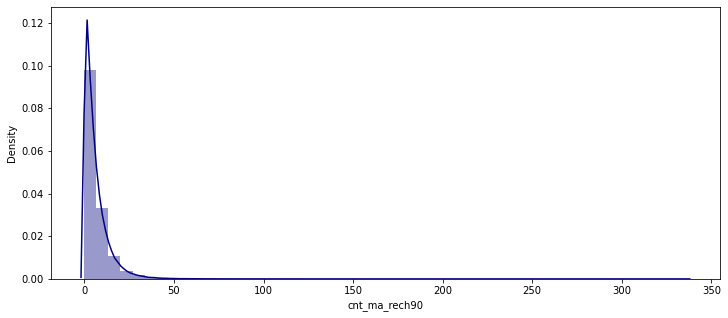

In [18]:
plt.figure(figsize=(12,5))
sns.distplot(df['cnt_ma_rech90'], color='navy')
plt.show()

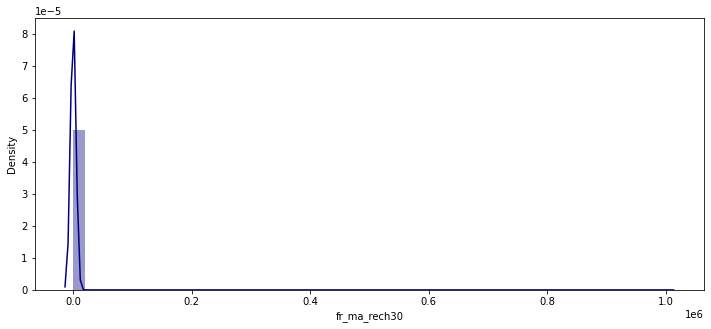

In [19]:
plt.figure(figsize=(12,5))
sns.distplot(df['fr_ma_rech30'], color='navy')
plt.show()

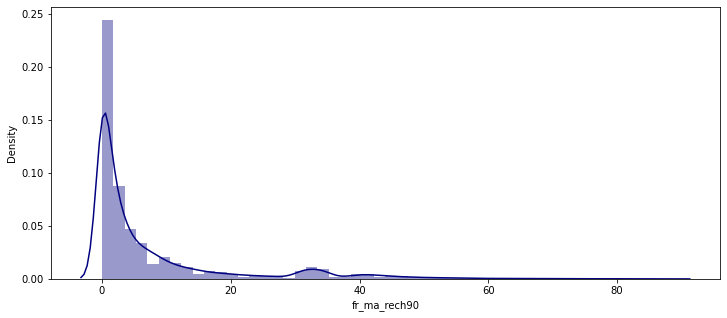

In [20]:
plt.figure(figsize=(12,5))
sns.distplot(df['fr_ma_rech90'], color='navy')
plt.show()

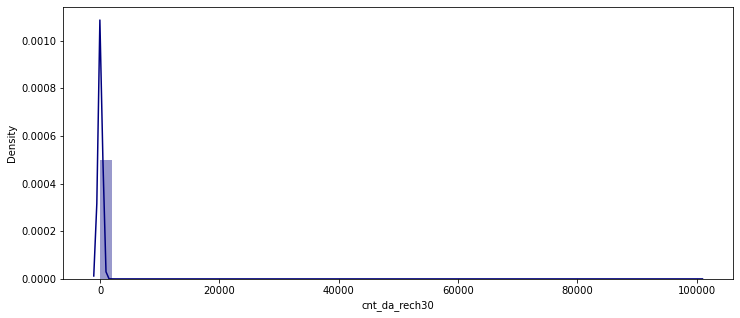

In [21]:
plt.figure(figsize=(12,5))
sns.distplot(df['cnt_da_rech30'], color='navy')
plt.show()

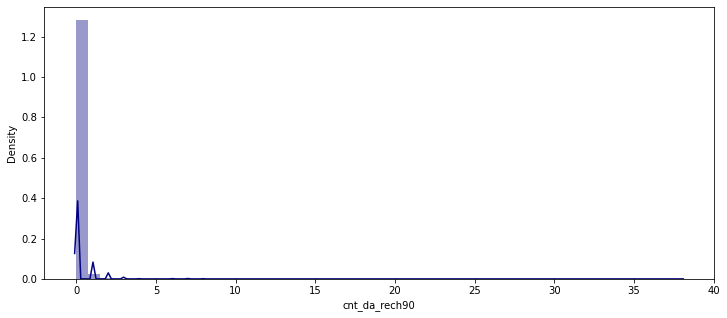

In [22]:
plt.figure(figsize=(12,5))
sns.distplot(df['cnt_da_rech90'], color='navy')
plt.show()

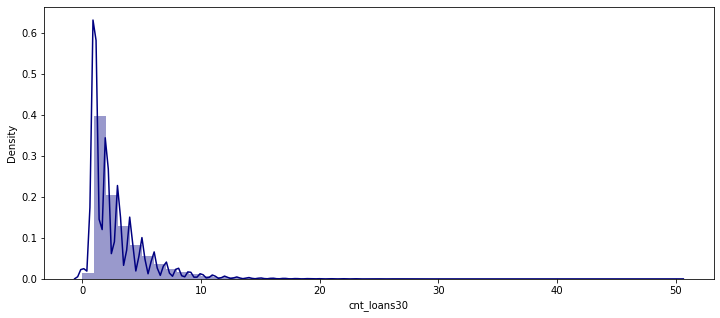

In [23]:
plt.figure(figsize=(12,5))
sns.distplot(df['cnt_loans30'], color='navy')
plt.show()

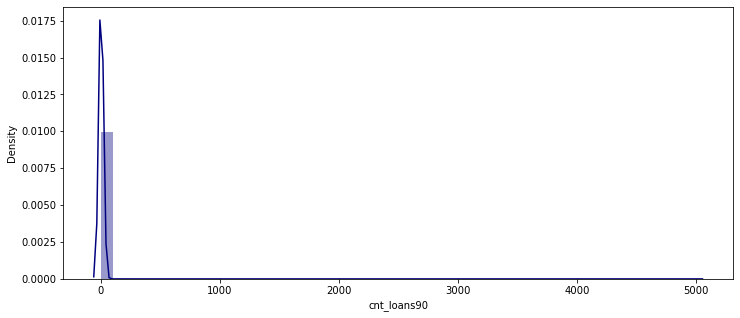

In [24]:
plt.figure(figsize=(12,5))
sns.distplot(df['cnt_loans90'], color='navy')
plt.show()

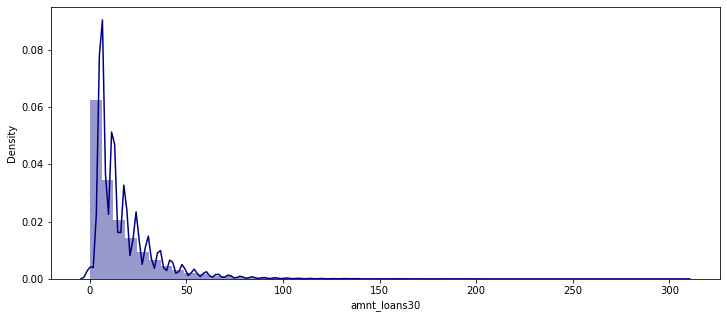

In [25]:
plt.figure(figsize=(12,5))
sns.distplot(df['amnt_loans30'], color='navy')
plt.show()

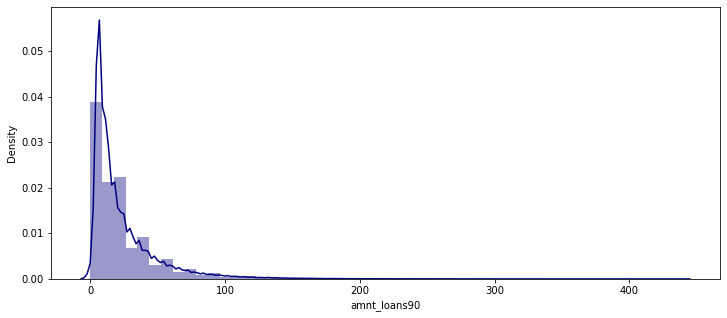

In [26]:
plt.figure(figsize=(12,5))
sns.distplot(df['amnt_loans90'], color='navy')
plt.show()

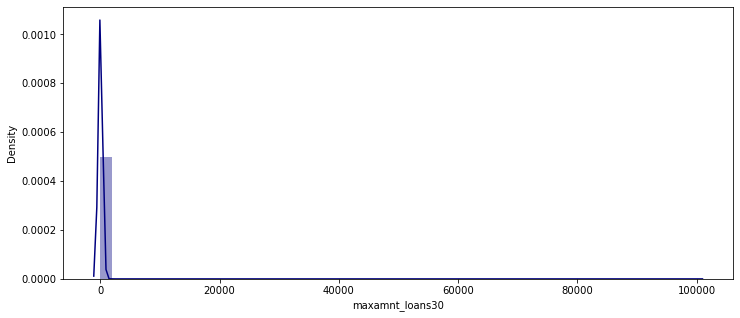

In [27]:
plt.figure(figsize=(12,5))
sns.distplot(df['maxamnt_loans30'], color='navy')
plt.show()

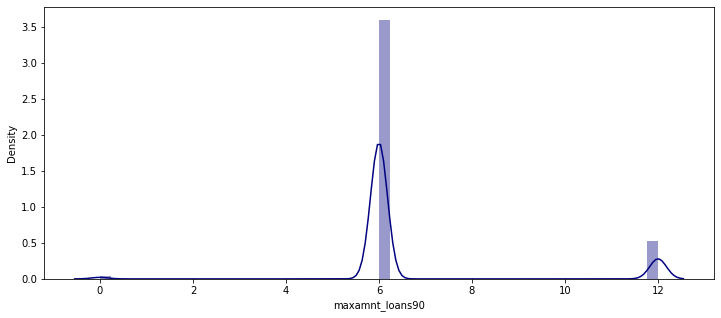

In [28]:
plt.figure(figsize=(12,5))
sns.distplot(df['maxamnt_loans90'], color='navy')
plt.show()

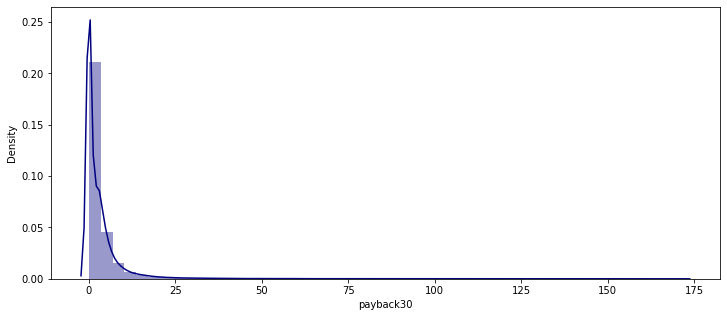

In [29]:
plt.figure(figsize=(12,5))
sns.distplot(df['payback30'], color='navy')
plt.show()

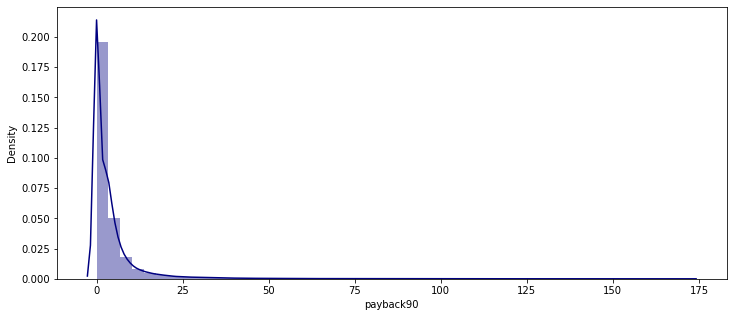

In [30]:
plt.figure(figsize=(12,5))
sns.distplot(df['payback90'], color='navy')
plt.show()

<AxesSubplot:xlabel='count', ylabel='amnt_loans30'>

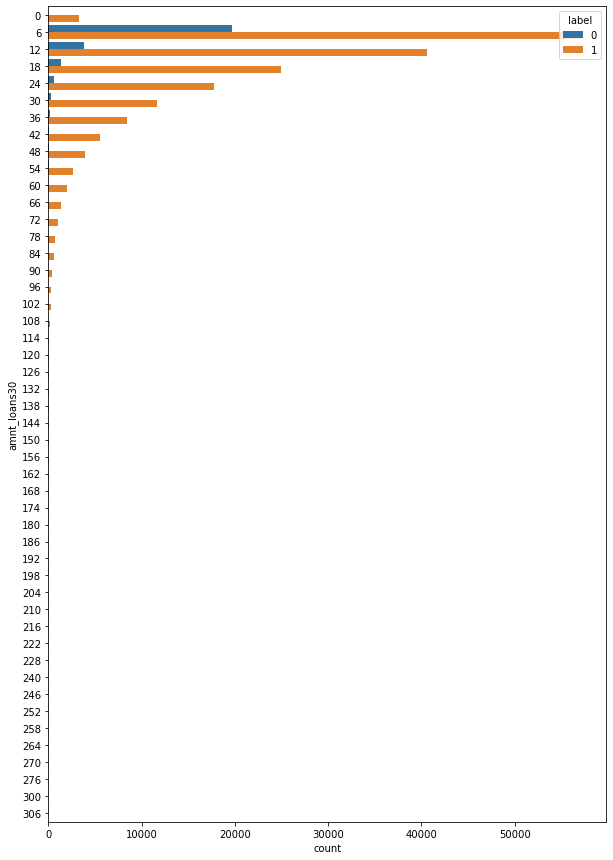

In [31]:
plt.subplots(figsize=(10,15))
sns.countplot(y="amnt_loans30",hue="label",data=df)

<AxesSubplot:xlabel='count', ylabel='amnt_loans90'>

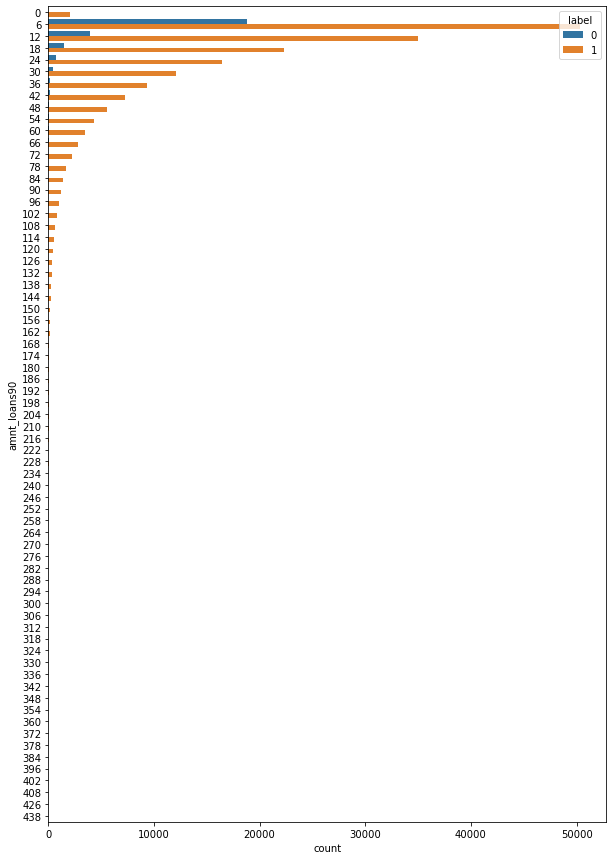

In [32]:
plt.subplots(figsize=(10,15))
sns.countplot(y="amnt_loans90",hue="label",data=df)

In [33]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

<AxesSubplot:xlabel='count', ylabel='cnt_loans30'>

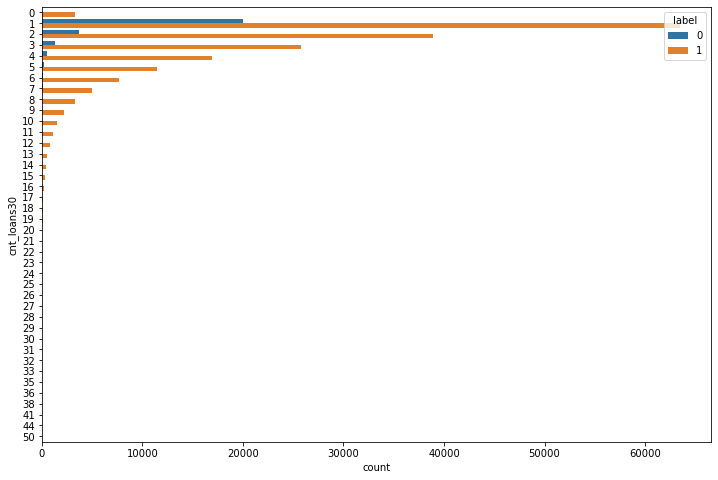

In [34]:
plt.subplots(figsize=(12,8))
sns.countplot(y="cnt_loans30",hue="label",data=df)

<AxesSubplot:xlabel='count', ylabel='amnt_loans30'>

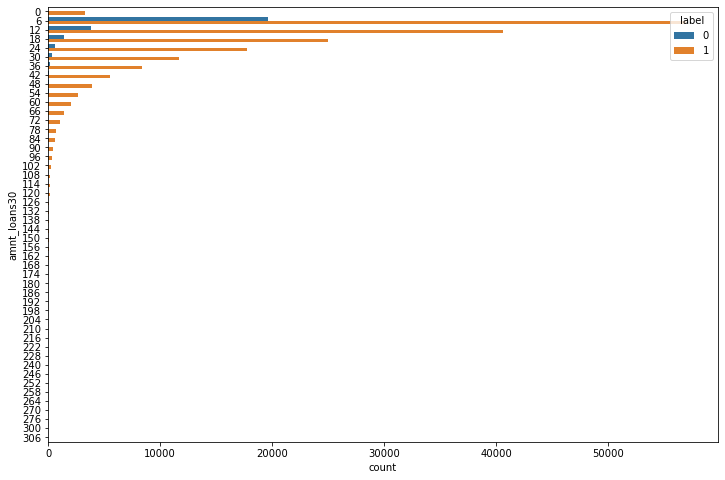

In [35]:
plt.subplots(figsize=(12,8))
sns.countplot(y="amnt_loans30",hue="label",data=df)

<AxesSubplot:xlabel='count', ylabel='amnt_loans90'>

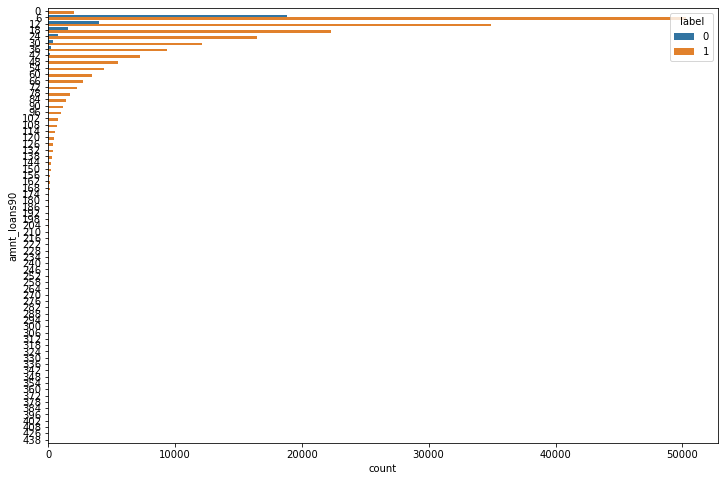

In [36]:
plt.subplots(figsize=(12,8))
sns.countplot(y="amnt_loans90",hue="label",data=df)

<AxesSubplot:xlabel='payback30'>

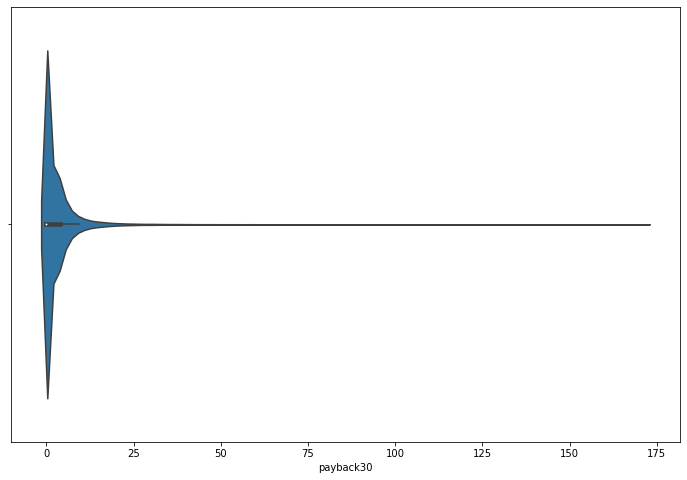

In [37]:
plt.subplots(figsize=(12,8))
sns.violinplot(x="payback30",hue="label",data=df)

<AxesSubplot:xlabel='payback90'>

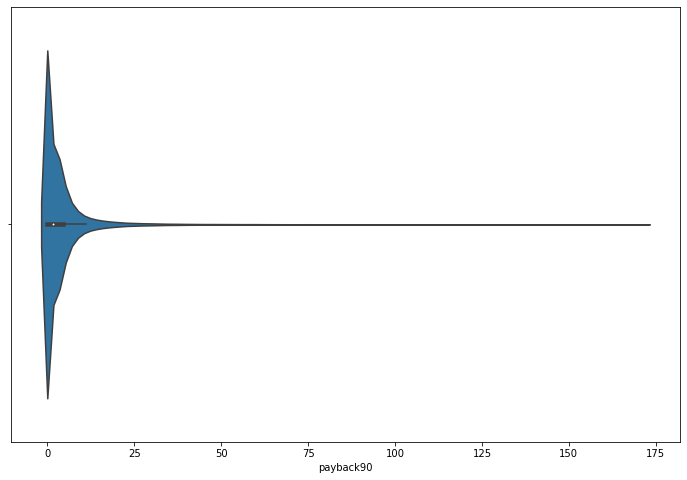

In [38]:
plt.subplots(figsize=(12,8))
sns.violinplot(x="payback90",hue="label",data=df)

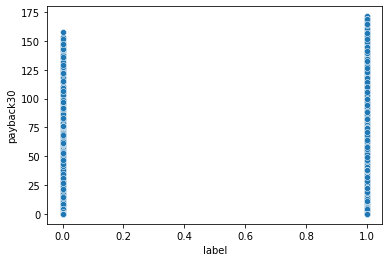

In [39]:
sns.scatterplot(x ="label", y ="payback30", data = df)
plt.show()

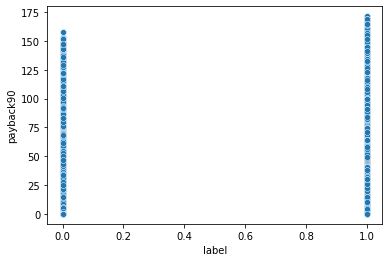

In [40]:
sns.scatterplot(x ="label", y ="payback90", data = df)
plt.show()

#### Converting the data type format of the "pdate" column

In [41]:
df["Year"] = pd.to_datetime(df.pdate, format="%Y-%m-%d").dt.year
df["Month"] = pd.to_datetime(df.pdate, format="%Y-%m-%d").dt.month
df["Day"] = pd.to_datetime(df.pdate, format="%Y-%m-%d").dt.day

### Statistical summary:

In [42]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Year,Month,Day
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.0,209593.000000,209593.00000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,2016.0,6.797321,14.39894
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,0.0,0.741435,8.43890
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.0,6.000000,1.00000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,2016.0,6.000000,7.00000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,2016.0,7.000000,14.00000
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,2016.0,7.000000,21.00000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,2016.0,8.000000,31.00000


### Correlation:

In [43]:
df.corr()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Year,Month,Day
Unnamed: 0,1.000000,0.000403,-0.002048,0.002739,0.003077,-0.003906,-0.003459,-0.001853,-0.001133,-0.001064,...,-0.002005,0.002241,0.000781,0.001742,-0.002615,-0.000040,0.002411,NaN,0.003205,-0.002045
label,0.000403,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,...,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183,NaN,0.154949,0.006825
aon,-0.002048,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,...,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203,NaN,-0.001863,0.000662
daily_decr30,0.002739,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,...,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175,NaN,0.518664,0.006477
daily_decr90,0.003077,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,...,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800,NaN,0.539410,-0.021508
rental30,-0.003906,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,...,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147,NaN,0.365699,0.036537
rental90,-0.003459,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,...,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501,NaN,0.429407,0.008941
last_rech_date_ma,-0.001853,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,...,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583,NaN,-0.001207,0.000560
last_rech_date_da,-0.001133,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,...,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417,NaN,-0.001800,0.000631
last_rech_amt_ma,-0.001064,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,...,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260,NaN,0.096919,0.028883


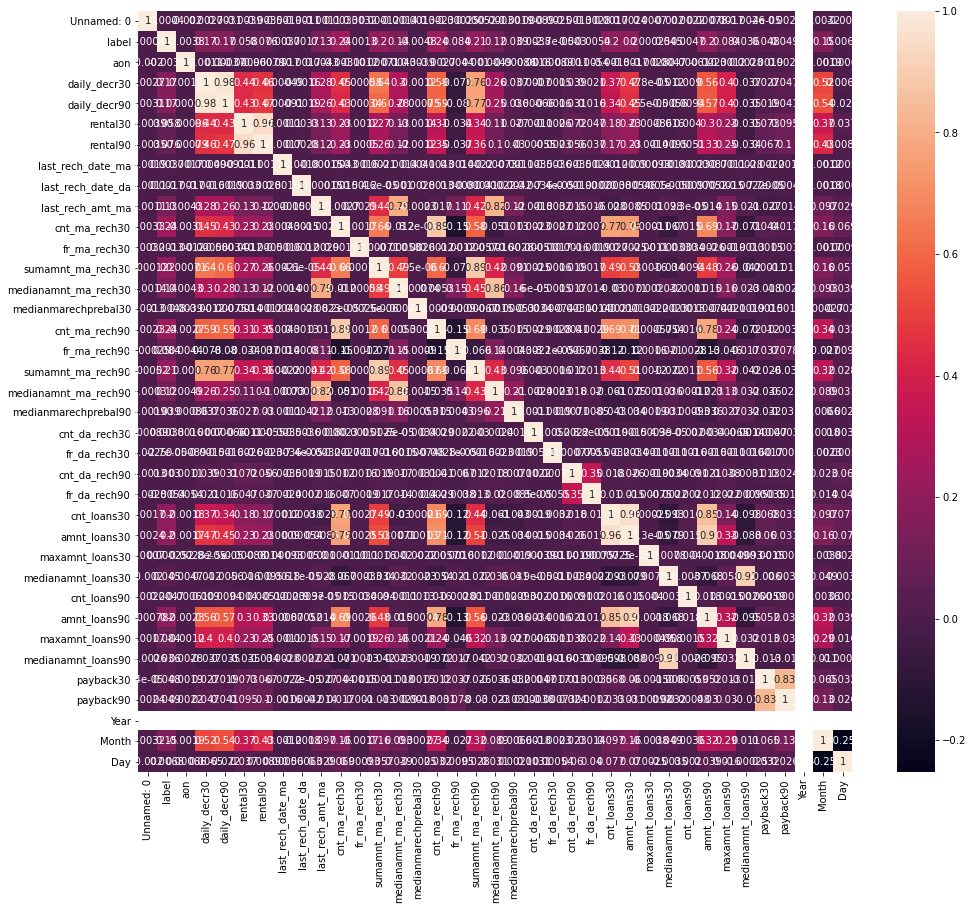

In [44]:
corr_hmap=df.corr()
plt.figure(figsize=(16,14))
sns.heatmap(corr_hmap,annot=True)
plt.show()

#### Dropping the columns

In [45]:
df.drop(['pdate'],axis=1,inplace=True)
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.drop(['Year'],axis=1,inplace=True)
df.drop(['msisdn'],axis=1,inplace=True)
df.drop(['fr_da_rech30'],axis=1,inplace=True)
df.drop(['maxamnt_loans30'],axis=1,inplace=True)
df.drop(['pcircle'],axis=1,inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  int64  
 9   cnt_ma_rech30         209593 non-null  int64  
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  int64  
 15  

In [47]:
df.shape

(209593, 33)

### Removing Outliers:

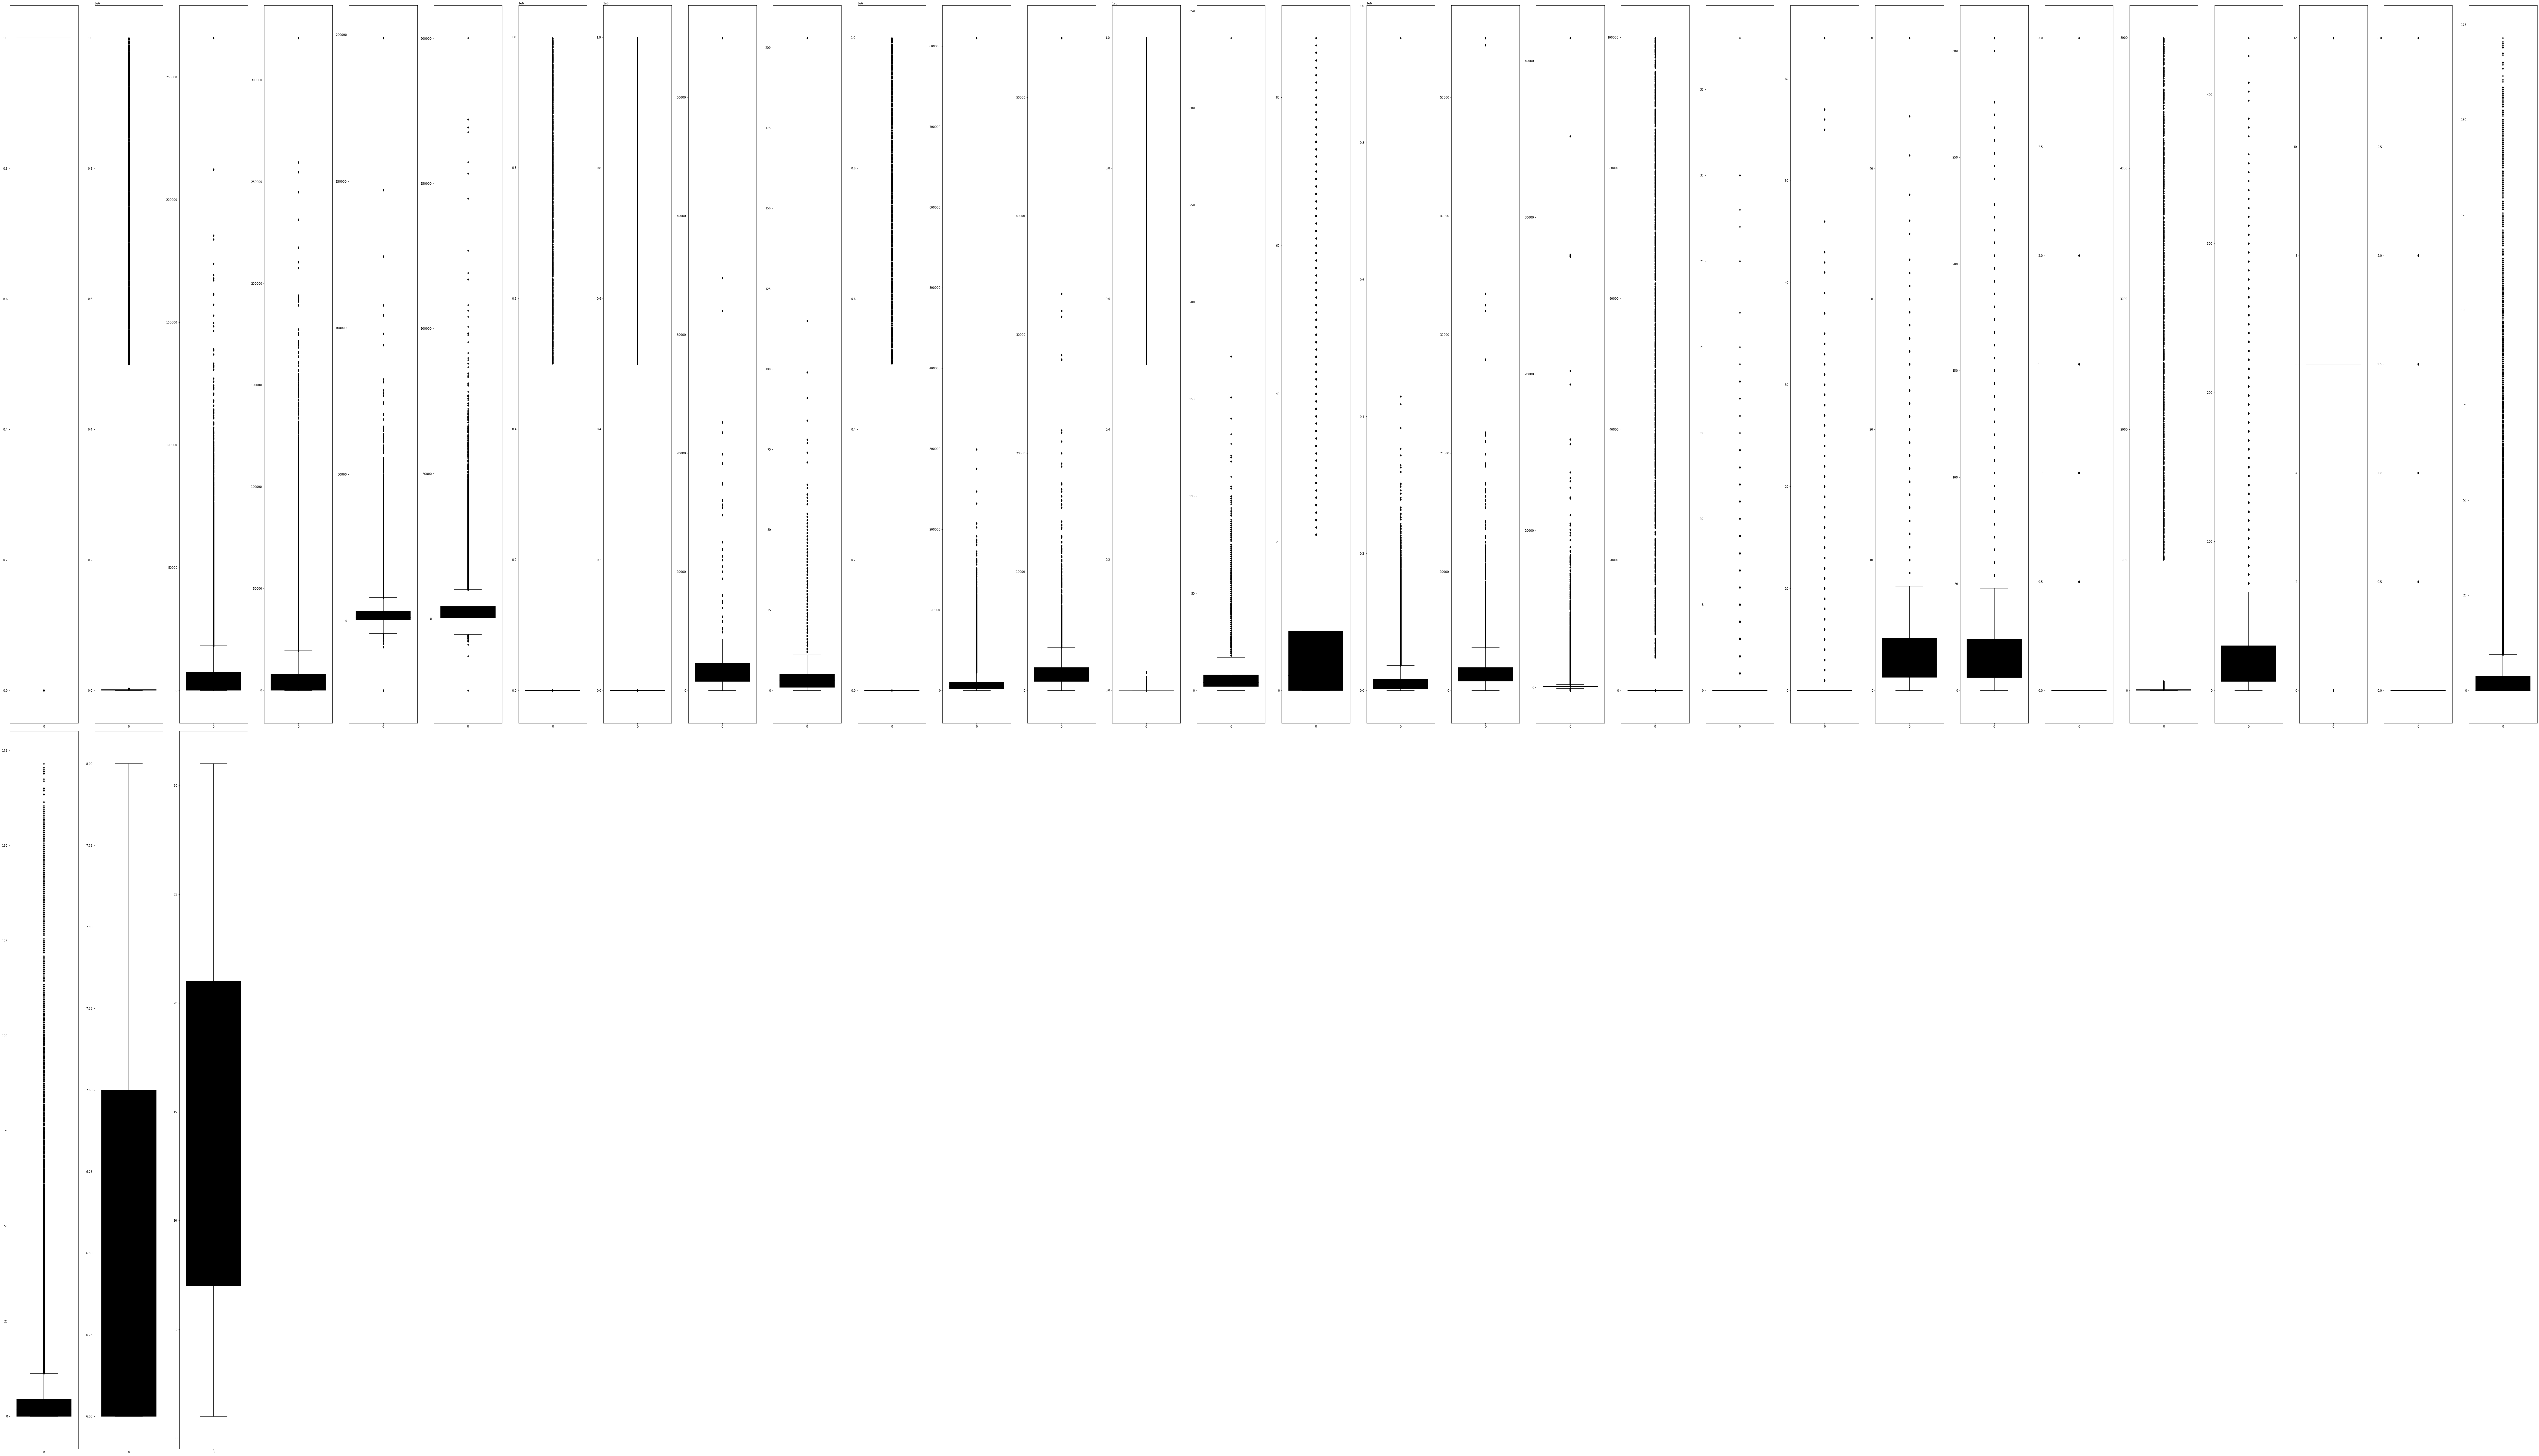

In [48]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(4*ncol,16*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='black',orient='v')
    plt.tight_layout()

In [49]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [50]:
new_df=df[(z<3).all(axis=1)]

In [51]:
new_df.shape

(163026, 33)

In [52]:
df.shape

(209593, 33)

### Skewness:

In [53]:
new_df.skew()

label                   -2.090282
aon                      0.958194
daily_decr30             1.963119
daily_decr90             2.077247
rental30                 2.195563
rental90                 2.244957
last_rech_date_ma        3.098605
last_rech_date_da       10.390692
last_rech_amt_ma         2.125025
cnt_ma_rech30            1.174958
fr_ma_rech30             2.005026
sumamnt_ma_rech30        1.635182
medianamnt_ma_rech30     2.325820
medianmarechprebal30    10.514000
cnt_ma_rech90            1.320723
fr_ma_rech90             1.984255
sumamnt_ma_rech90        1.706347
medianamnt_ma_rech90     2.372843
medianmarechprebal90     3.688959
cnt_da_rech30           51.006049
cnt_da_rech90            6.932690
fr_da_rech90             0.000000
cnt_loans30              1.465618
amnt_loans30             1.441398
medianamnt_loans30       5.355036
cnt_loans90              1.708099
amnt_loans90             1.694063
maxamnt_loans90          2.680114
medianamnt_loans90       6.100818
payback30     

### Spliting the data into Feature and Target:

In [54]:
x=new_df.drop('label',axis=1)
y=new_df['label']

In [55]:
x.shape

(163026, 32)

In [56]:
y.shape

(163026,)

In [57]:
x

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,amnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Day
0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,...,12,0.0,2.0,12,6,0.0,29.000000,29.000000,7,20
1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,...,12,0.0,1.0,12,12,0.0,0.000000,0.000000,8,10
2,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,...,6,0.0,1.0,6,6,0.0,0.000000,0.000000,8,19
3,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,...,12,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,...,42,0.0,7.0,42,6,0.0,2.333333,2.333333,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,...,12,0.0,2.0,12,6,0.0,1.000000,1.000000,6,17
209589,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,...,18,0.0,3.0,18,6,0.0,1.000000,1.000000,6,12
209590,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,...,42,0.0,6.0,54,12,0.0,4.000000,3.833333,7,29
209591,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,...,18,0.0,3.0,24,12,0.0,0.000000,10.500000,7,25


In [58]:
y

0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 163026, dtype: int64

### Scalling:

In [59]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [60]:
x.shape

(163026, 32)

In [61]:
y.value_counts()

1    140409
0     22617
Name: label, dtype: int64

#### Oversampling:

In [62]:
import imblearn
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x,y)

##### # importing all the required libraries 

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, classification_report, roc_auc_score, roc_curve,auc

In [64]:
lc=LogisticRegression()
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lc.fit(x_train,y_train)
    pred=lc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is",maxAccu," on Random_state",maxRS)

Best Accuracy is 0.778131899437362  on Random_state 24


### Train Test Split the data:

Train Test Split the data: We got the Best Accuracy is 0.7782387294352254  on Random_state 110. Hence, using these values we are going to train our data using following models :-

Logistic Regression

Decision Tree Classifier

Random Forest Classifier

GaussianNB

KNeighbors Classifier

Gradient Boosting Classifier

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=110)

In [66]:
x_train.shape

(210613, 32)

In [67]:
x_test.shape

(70205, 32)

In [68]:
y_train.shape

(210613,)

In [69]:
y_test.shape

(70205,)

In [70]:
#Logistic Regression
lc=LogisticRegression()
lc.fit(x_train,y_train)
pred=lc.predict(x_test)
acc=accuracy_score(y_test,pred)
cnm=confusion_matrix(y_test,pred)
cr=classification_report(y_test,pred)

# Getting the accuarcy score
print(f"Accuracy Score: {acc}")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the confusion matrix
print(f"Confusion Matrix : \n {cnm}\n")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the classification report
print(f"Classification Report : \n {cr}")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the CV score
cv=cross_val_score(lc,x,y,cv=5).mean()
print("Cross Validation Score for Logistic Regression is : ",cv)
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the difference between the accuracy score and CV score
result = acc - cv
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 0.7754006124919878
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Confusion Matrix : 
 [[28595  6591]
 [ 9177 25842]]

 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Classification Report : 
               precision    recall  f1-score   support

           0       0.76      0.81      0.78     35186
           1       0.80      0.74      0.77     35019

    accuracy                           0.78     70205
   macro avg       0.78      0.78      0.78     70205
weighted avg       0.78      0.78      0.78     70205

 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Cross Validation Score for Logistic Regression is :  0.7744945224861792
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 

Accuracy Score - Cross Validation Score : 0.0009060900058085464


In [71]:
#Decision Tree Classifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
acc=accuracy_score(y_test,pred)
cnm=confusion_matrix(y_test,pred)
cr=classification_report(y_test,pred)

# Getting the accuarcy score
print(f"Accuracy Score: {acc}")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the confusion matrix
print(f"Confusion Matrix : \n {cnm}\n")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the classification report
print(f"Classification Report : \n {cr}")

# Getting the CV score
cvdt=cross_val_score(dt,x,y,cv=5).mean()
print("Cross Validation Score for Decision Tree Classifier is : ",cvdt)
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the difference between the accuracy score and CV score
result = acc - cvdt
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 0.9051919378961613
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Confusion Matrix : 
 [[32064  3122]
 [ 3534 31485]]

 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.91      0.91     35186
           1       0.91      0.90      0.90     35019

    accuracy                           0.91     70205
   macro avg       0.91      0.91      0.91     70205
weighted avg       0.91      0.91      0.91     70205

Cross Validation Score for Decision Tree Classifier is :  0.9020398909396519
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 

Accuracy Score - Cross Validation Score : 0.003152046956509391


In [72]:
#Random Forest Classifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
acc=accuracy_score(y_test,pred)
cnm=confusion_matrix(y_test,pred)
cr=classification_report(y_test,pred)

# Getting the accuarcy score
print(f"Accuracy Score: {acc}")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the confusion matrix
print(f"Confusion Matrix : \n {cnm}\n")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the classification report
print(f"Classification Report : \n {cr}")

# Getting the CV score
cvrf=cross_val_score(rf,x,y,cv=5).mean()
print("Cross Validation Score for Random Forest Classifier is : ",cvrf)
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the difference between the accuracy score and CV score
result = acc - cvrf
print("\nAccuracy Score - Cross Validation Score :", result)


Accuracy Score: 0.9490064810198704
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Confusion Matrix : 
 [[33480  1706]
 [ 1874 33145]]

 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     35186
           1       0.95      0.95      0.95     35019

    accuracy                           0.95     70205
   macro avg       0.95      0.95      0.95     70205
weighted avg       0.95      0.95      0.95     70205

Cross Validation Score for Random Forest Classifier is :  0.9447472777631922
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 

Accuracy Score - Cross Validation Score : 0.004259203256678168


In [73]:
#Gaussian NB
gb=GaussianNB()
gb.fit(x_train,y_train)
pred=gb.predict(x_test)
acc=accuracy_score(y_test,pred)
cnm=confusion_matrix(y_test,pred)
cr=classification_report(y_test,pred)

# Getting the accuarcy score
print(f"Accuracy Score: {acc}")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the confusion matrix
print(f"Confusion Matrix : \n {cnm}\n")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the classification report
print(f"Classification Report : \n {cr}")

# Getting the CV score
cvgb=cross_val_score(gb,x,y,cv=5).mean()
print("Cross Validation Score for GaussianNB is : ",cvgb)
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the difference between the accuracy score and CV score
result = acc - cvgb
print("\nAccuracy Score - Cross Validation Score :", result)


Accuracy Score: 0.7294067374118652
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Confusion Matrix : 
 [[30241  4945]
 [14052 20967]]

 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Classification Report : 
               precision    recall  f1-score   support

           0       0.68      0.86      0.76     35186
           1       0.81      0.60      0.69     35019

    accuracy                           0.73     70205
   macro avg       0.75      0.73      0.72     70205
weighted avg       0.75      0.73      0.72     70205

Cross Validation Score for GaussianNB is :  0.7292730631822327
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 

Accuracy Score - Cross Validation Score : 0.00013367422963250775


In [74]:
#KNeighbors Classifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
acc=accuracy_score(y_test,pred)
cnm=confusion_matrix(y_test,pred)
cr=classification_report(y_test,pred)

# Getting the accuarcy score
print(f"Accuracy Score: {acc}")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the confusion matrix
print(f"Confusion Matrix : \n {cnm}\n")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the classification report
print(f"Classification Report : \n {cr}")

# Getting the CV score
cvknn=cross_val_score(knn,x,y,cv=5).mean()
print("Cross Validation Score for KNeighborsClassifier is : ",cvknn)
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the difference between the accuracy score and CV score
result = acc - cvknn
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 0.8782280464354391
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Confusion Matrix : 
 [[34593   593]
 [ 7956 27063]]

 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.98      0.89     35186
           1       0.98      0.77      0.86     35019

    accuracy                           0.88     70205
   macro avg       0.90      0.88      0.88     70205
weighted avg       0.90      0.88      0.88     70205

Cross Validation Score for KNeighborsClassifier is :  0.8787470948126442
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 

Accuracy Score - Cross Validation Score : -0.0005190483772051779


In [76]:
#Gradient Boosting Classifer
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
acc=accuracy_score(y_test,pred)
cnm=confusion_matrix(y_test,pred)
cr=classification_report(y_test,pred)

# Getting the accuarcy score
print(f"Accuracy Score: {acc}")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the confusion matrix
print(f"Confusion Matrix : \n {cnm}\n")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the classification report
print(f"Classification Report : \n {cr}")

# Getting the CV score
cvgbc=cross_val_score(gbc,x,y,cv=5).mean()
print("Cross Validation Score for Gradient Boosting Classifier is : ",cvgbc)
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the difference between the accuracy score and CV score
result = acc - cvgbc
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 0.9000356099992878
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Confusion Matrix : 
 [[32090  3096]
 [ 3922 31097]]

 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.91      0.90     35186
           1       0.91      0.89      0.90     35019

    accuracy                           0.90     70205
   macro avg       0.90      0.90      0.90     70205
weighted avg       0.90      0.90      0.90     70205

Cross Validation Score for Gradient Boosting Classifier is :  0.8959718704046905
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 

Accuracy Score - Cross Validation Score : 0.004063739594597271


### Overfitting & Underfitting:

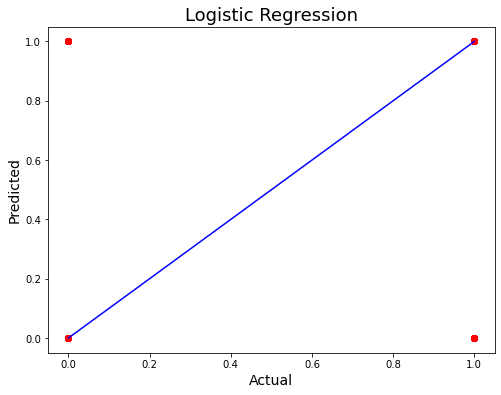

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(y_test,pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Logistic Regression',fontsize=18)
plt.show()

### Hyper Parameter Tuning:

We are selecting GaussianNB as our best model as it has least difference between it's Accuracy score and CV score

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
parameter={'var_smoothing': np.logspace(0,-9, num=100)}

In [84]:
GCV=GridSearchCV(gb,parameter,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [85]:

GCV.best_params_

{'var_smoothing': 5.336699231206313e-06}

In [91]:
micro_final=GaussianNB(var_smoothing=5.336699231206313e-06)
micro_final.fit(x_train,y_train)
pred=micro_final.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

72.94067374118653


#### We are getting the model accuracy and cross validation score both as 72.94% which shows our model is performing well.

### AUC - ROC Curve:
AUC Curve - A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

ROC Curves - It summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.

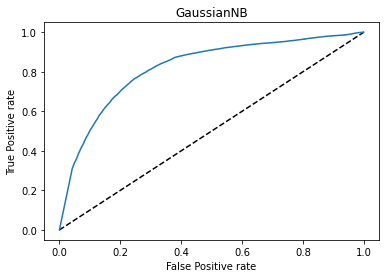

The AUC Score is  0.7290966330858025


In [92]:
y_pred_proba= gb.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='dtr')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('GaussianNB')
plt.show()

# Getting the AUC score
auc_score=roc_auc_score(y_test,gb.predict(x_test))
print('The AUC Score is ',auc_score)

### Saving the model:

In [93]:
import joblib
joblib.dump(micro_final,"Micro Credit Defaulter Model.pkl")

['Micro Credit Defaulter Model.pkl']

In [94]:
micro_model = joblib.load(open('Micro Credit Defaulter Model.pkl','rb'))
result = micro_model.score(x_test,y_test)
print(result)

0.7294067374118652


### Conclusion

In [95]:
Conclusion = pd.DataFrame([micro_model.predict(x_test)[:],gb.predict(x_test)[:]],index=["Predicted","Original"])
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,70195,70196,70197,70198,70199,70200,70201,70202,70203,70204
Predicted,1,0,1,1,0,1,0,0,0,1,...,0,0,1,0,0,1,1,1,0,0
Original,1,0,1,1,0,1,0,0,0,1,...,0,0,1,0,0,1,1,1,0,0


                                                    ----- --:-- -----